<a href="https://colab.research.google.com/github/Mitshd/Machine-Learning/blob/main/digit_recognition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import random
import matplotlib.pyplot as plt
import math
from PIL import Image
import numpy as np
data = pd.read_csv("sample_data/mnist_test.csv")
x = data.to_numpy()
def image_show(a):
   z = []
   y = []
   for j in range(len(x[a][1:])):
      
     b = [x[a][1:][j]%256,0,0]
     y.append(b)
     #print(y,len(y),i)
     
     if len(y) == 28:
         #print("ahahah")
         z.append(y)
         y = []
   
   return z
#D = Dimension of the input vector 
#M = number of units in each hidden layer
#N = number of data points available for training
#L = number of hidden layers
D = 784
M = [12,10,8]
N = 1
L = len(M)


#generating random weights and biases
#takes input as D = Dimension of the input vector, M = number of units in first hidden layer
def weight_bias_matrix(D,M):
    arr = []
    for i in range(M):
        arr.append([])
        for j in range(D):
            var = random.randint(0,1000)
            var = var/1000
            arr[i].append(var)
    return(arr)

#holds arrays of linear combinations in each hidden layer
Layer_LC = []

#creating the weights and biases for each hidden layer
#base case
arr = weight_bias_matrix(D,M[0])
Layer_LC.append(arr)
#index l will go thru for each layer
for l in range(1,len(M)):
    arr = weight_bias_matrix(M[l-1],M[l])
    Layer_LC.append(arr)
    #print(arr,l,len(arr))

#this is the nonlinear transformation using a sigmoid function
def NL_func(var):
    var = 1/(1+math.exp(-var))
    return(var)
    
#for last layer we use softmax function
def softmax(arr):
  e_arr = []
  sum = 0
  for i in range(len(arr)):
    a = math.exp(arr[i])
    e_arr.append(a)
    sum += a
  for i in range(len(e_arr)):
    e_arr[i] = e_arr[i]/sum
  return(e_arr)
#making all the layers
#l goes thru each layer for linear combinations
#LC_layer will store the data of linear combinations and then nonlinear transformation of it
#this is custom special case for the first layer
result = []#result will store the final prediction arrays of all the training data sets


In [ ]:
print(Layer_LC[0][0][777])

0.385


In [ ]:
LC_Layer_master = []
for q in range(len(x)):
  LC_Layer = [[]]
  var = 0
  for i in range(M[0]):#12
      
      for j in range(D):
          var += x[q][1:][j]*Layer_LC[0][i][j]*.00001

      var = NL_func(var)

      LC_Layer[0].append(var)    
  LC_Layer_master.append(LC_Layer)
  #making all the layers
#l goes thru each layer for linear combinations
#LC_layer will store the data of linear combinations and then nonlinear transformation of it
#this is starting from the output of nonlinear transformation from the first layer
  for l in range(1,len(M)-1):
      LC_Layer.append([])
      
      for i in range(M[l]):#10
          var = 0
          
          for j in range(len(LC_Layer[l-1])):
              #print(len(LC_Layer[l-1]))
              var += LC_Layer[l-1][j]*Layer_LC[l][i][j]*.00001
          
          var = NL_func(var)
          
          LC_Layer[l].append(var)    

  #final layer
  for i in range(M[len(M)-1]):#last
          var = 0
          arr = []
          for j in range(len(LC_Layer[len(M)-2])):
              #print(len(LC_Layer[l-1]))
            var += LC_Layer[len(M)-2][j]*Layer_LC[len(M)-1][i][j]*.00001
          
            arr.append(var)
          #print(arr)
          arr = softmax(arr)
          #print(arr)
          
          LC_Layer.append(arr)    

  result.append(LC_Layer_master[q][2]) 


In [ ]:
#making an ordered array for the data set that has the one_hot representation of the actual values of the images given
correct_value = []
for q in range(len(x)):
  arr = one_hot(x[q][0])
  correct_value.append(arr)

In [ ]:
#finding error
#converting our correct arrays into numpy form
result = np.array(result)
correct_value = np.array(correct_value)
# Using 'auto'/'sum_over_batch_size' reduction type.
cce = tf.keras.losses.CategoricalCrossentropy()
cce(correct_value, result).numpy()

2.302585180344248

In [ ]:
print(len(result))


9999


In [ ]:
#making all the layers
#l goes thru each layer for linear combinations
#LC_layer will store the data of linear combinations and then nonlinear transformation of it
#this is starting from the output of nonlinear transformation from the first layer
for l in range(1,len(M)-1):
    LC_Layer.append([])
    
    for i in range(M[l]):#10
        var = 0
        
        for j in range(len(LC_Layer[l-1])):
            #print(len(LC_Layer[l-1]))
            var += LC_Layer[l-1][j]*Layer_LC[l][i][j]*.00001
        
        var = NL_func(var)
        
        LC_Layer[l].append(var)    

print(LC_Layer)

print(Layer_LC)
#final layer
for i in range(M[len(M)-1]):#last
        var = 0
        arr = []
        for j in range(len(LC_Layer[len(M)-2])):
            #print(len(LC_Layer[l-1]))
          var += LC_Layer[len(M)-2][j]*Layer_LC[len(M)-1][i][j]*.00001
        
          arr.append(var)
        #print(arr)
        arr = softmax(arr)
        #print(arr)
        
        LC_Layer.append(arr)    

print(LC_Layer)


In [ ]:
#making an ordered array for the data set that has the one_hot representation of the actual values of the images given
correct_value = []
for q in range(len(x)):
  arr = one_hot(x[q][0])
  correct_value.append(arr)

In [ ]:
result = np.array(result)
correct_value = np.array(correct_value)

In [ ]:
print(result[0:10])

In [ ]:
correct_value[1]

array([0., 1., 0., 0., 0., 0., 0., 0., 0., 0.])

In [ ]:
cce = tf.keras.losses.CategoricalCrossentropy()
cce(correct_value, result).numpy()

ValueError: ignored

In [ ]:
print(result.shape,correct_value.shape)

(79992, 10) (9999, 10)


In [ ]:
print(correct_value)

[array([0., 0., 1., 0., 0., 0., 0., 0., 0., 0.]), array([0., 1., 0., 0., 0., 0., 0., 0., 0., 0.]), array([1., 0., 0., 0., 0., 0., 0., 0., 0., 0.]), array([0., 0., 0., 0., 1., 0., 0., 0., 0., 0.]), array([0., 1., 0., 0., 0., 0., 0., 0., 0., 0.]), array([0., 0., 0., 0., 1., 0., 0., 0., 0., 0.]), array([0., 0., 0., 0., 0., 0., 0., 0., 0., 1.]), array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.]), array([0., 0., 0., 0., 0., 0., 0., 0., 0., 1.]), array([1., 0., 0., 0., 0., 0., 0., 0., 0., 0.]), array([0., 0., 0., 0., 0., 0., 1., 0., 0., 0.]), array([0., 0., 0., 0., 0., 0., 0., 0., 0., 1.]), array([1., 0., 0., 0., 0., 0., 0., 0., 0., 0.]), array([0., 1., 0., 0., 0., 0., 0., 0., 0., 0.]), array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.]), array([0., 0., 0., 0., 0., 0., 0., 0., 0., 1.]), array([0., 0., 0., 0., 0., 0., 0., 1., 0., 0.]), array([0., 0., 0., 1., 0., 0., 0., 0., 0., 0.]), array([0., 0., 0., 0., 1., 0., 0., 0., 0., 0.]), array([0., 0., 0., 0., 0., 0., 0., 0., 0., 1.]), array([0., 0., 0., 

In [ ]:
#gives the number in one_hot representation or 1 of k coding scheme
def one_hot(n):
  arr = np.zeros(10)
  arr[n] = 1
  return(arr)

In [ ]:
arr = one_hot(4)
print(arr[1] - LC_Layer[2][2])

-0.09999966384192467


In [ ]:
data = pd.read_csv("sample_data/mnist_test.csv")

In [ ]:
x = data.to_numpy()


In [ ]:
print(len(x))

9999


In [ ]:
print(x[879][0:])

[  7   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0 164 187
 187 104  45  13   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0 214 254 254 254 245  63   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
  42 214 247 254 254 233 208 209 125  72   0   0   

In [ ]:
import random
import matplotlib.pyplot as plt
import math
from PIL import Image
import numpy as np

In [ ]:
def image_show(a):
   z = []
   y = []
   for j in range(len(x[a][1:])):
      
     b = [x[a][1:][j]%256,0,0]
     y.append(b)
     #print(y,len(y),i)
     
     if len(y) == 28:
         #print("ahahah")
         z.append(y)
         y = []
   
   return z


7023 0


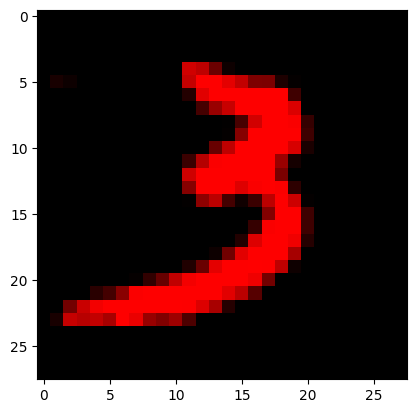

26 1


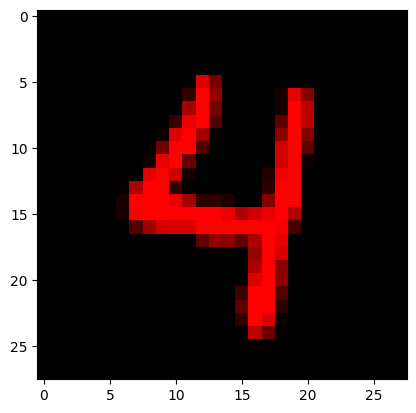

1160 2


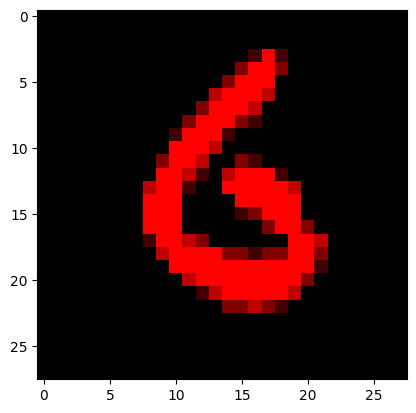

2743 3


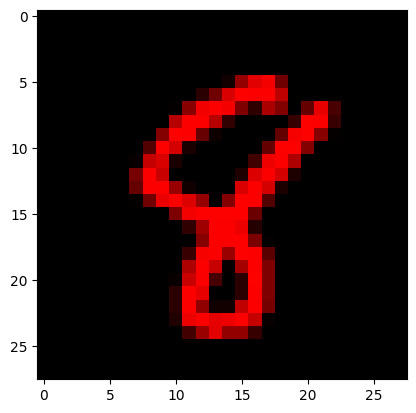

5840 4


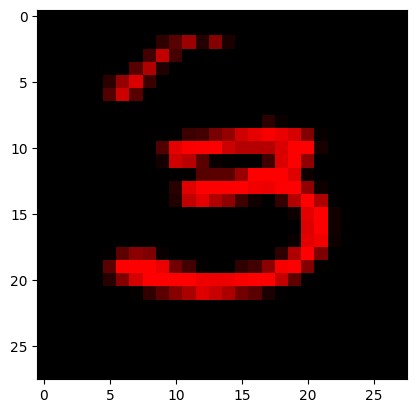

In [ ]:
for i in range(5):
  a = random.randint(0,9999)
  z = image_show(a)
  print(a,i)
  imgplot = plt.imshow(z)
  plt.show()

In [ ]:
#D = Dimension of the input vector 
#M = number of units in each hidden layer
#N = number of data points available for training
#L = number of hidden layers
D = 784
M = [12,10,8]
N = 1
L = len(M)


#generating random weights and biases
#takes input as D = Dimension of the input vector, M = number of units in first hidden layer
def weight_bias_matrix(D,M):
    arr = []
    for i in range(M):
        arr.append([])
        for j in range(D):
            var = random.randint(0,1000)
            var = var/1000
            arr[i].append(var)
    return(arr)

#holds arrays of linear combinations in each hidden layer
Layer_LC = []

#creating the weights and biases for each hidden layer
#base case
arr = weight_bias_matrix(D,M[0])
Layer_LC.append(arr)
#index l will go thru for each layer
for l in range(1,len(M)):
    arr = weight_bias_matrix(M[l-1],M[l])
    Layer_LC.append(arr)
    #print(arr,l,len(arr))

#this is the nonlinear transformation using a sigmoid function
def NL_func(var):
    var = 1/(1+math.exp(-var))
    return(var)
    



In [ ]:
#for last layer we use softmax function
def softmax(arr):
  e_arr = []
  sum = 0
  for i in range(len(arr)):
    a = math.exp(arr[i])
    e_arr.append(a)
    sum += a
  for i in range(len(e_arr)):
    e_arr[i] = e_arr[i]/sum
  return(e_arr)


In [ ]:
print(softmax([1,2,3,4,5,7,89,0]))
print(sum(softmax([1,2,3,4,5,7,89,0])))

[6.054601895401186e-39, 1.6458114310822737e-38, 4.4737793061811207e-38, 1.2160992992528254e-37, 3.305700626760734e-37, 2.4426007377405274e-36, 1.0, 2.2273635617957434e-39]
1.0


In [ ]:
#making all the layers
#l goes thru each layer for linear combinations
#LC_layer will store the data of linear combinations and then nonlinear transformation of it
#this is custom special case for the first layer
LC_Layer = [[]]
var = 0
for i in range(M[0]):#12
    
    for j in range(D):
        var += x[0][j]*Layer_LC[0][i][j]*.00001

    var = NL_func(var)

    LC_Layer[0].append(var)    
#making all the layers
#l goes thru each layer for linear combinations
#LC_layer will store the data of linear combinations and then nonlinear transformation of it
#this is starting from the output of nonlinear transformation from the first layer
for l in range(1,len(M)-1):
    LC_Layer.append([])
    
    for i in range(M[l]):#10
        var = 0
        
        for j in range(len(LC_Layer[l-1])):
            #print(len(LC_Layer[l-1]))
            var += LC_Layer[l-1][j]*Layer_LC[l][i][j]*.00001
        
        var = NL_func(var)
        
        LC_Layer[l].append(var)    

print(LC_Layer)

print(Layer_LC)

[[0.5359260921295576, 0.661819660831411, 0.6926929870487947, 0.6991612103815015, 0.701652254589495, 0.7004138525660186, 0.6990112636075257, 0.7034441153548073, 0.6971588723510942, 0.6967267500126557, 0.6965981525990939, 0.6984980330279663], [0.5000106492405951, 0.5000116784270515, 0.5000089754173891, 0.5000130629435471, 0.5000113201745653, 0.5000105892493166, 0.5000095483432662, 0.5000096526557627, 0.5000078688269934, 0.5000085370149998]]
[[[0.592, 0.223, 0.265, 0.625, 0.045, 0.508, 0.44, 0.624, 0.51, 0.702, 0.764, 0.002, 0.863, 0.157, 0.225, 0.876, 0.038, 0.843, 0.579, 0.591, 0.255, 0.265, 0.963, 0.786, 0.627, 0.984, 0.143, 0.72, 0.364, 0.321, 0.551, 0.421, 0.99, 0.808, 0.252, 0.794, 0.031, 0.177, 0.116, 0.018, 0.153, 0.365, 0.906, 0.778, 0.946, 0.749, 0.513, 0.667, 0.051, 0.981, 0.167, 0.212, 0.246, 0.937, 0.849, 0.452, 0.454, 0.954, 0.798, 0.14, 0.8, 0.538, 0.957, 0.954, 0.717, 0.204, 0.781, 0.661, 0.398, 0.067, 0.127, 0.047, 0.815, 0.883, 0.162, 0.697, 0.734, 0.284, 0.51, 0.627, 0.

In [ ]:
print(len(Layer_LC))

3


In [ ]:
#final layer
for i in range(M[len(M)-1]):#last
        var = 0
        arr = []
        for j in range(len(LC_Layer[len(M)-2])):
            #print(len(LC_Layer[l-1]))
          var += LC_Layer[len(M)-2][j]*Layer_LC[len(M)-1][i][j]*.00001
        
          arr.append(var)
        #print(arr)
        arr = softmax(arr)
        #print(arr)
        
        LC_Layer.append(arr)    

print(LC_Layer)


[[0.5359260921295576, 0.661819660831411, 0.6926929870487947, 0.6991612103815015, 0.701652254589495, 0.7004138525660186, 0.6990112636075257, 0.7034441153548073, 0.6971588723510942, 0.6967267500126557, 0.6965981525990939, 0.6984980330279663], [0.5000106492405951, 0.5000116784270515, 0.5000089754173891, 0.5000130629435471, 0.5000113201745653, 0.5000105892493166, 0.5000095483432662, 0.5000096526557627, 0.5000078688269934, 0.5000085370149998], [0.09999918683523293, 0.09999934783781375, 0.09999966384192467, 0.09999976084417983, 0.09999984884600044, 0.10000025285476201, 0.10000045535934617, 0.10000048185998195, 0.10000049736030175, 0.10000050436045634], [0.0999989306807589, 0.09999909968304181, 0.0999994241864718, 0.09999971319277565, 0.09999994869770931, 0.10000000219882924, 0.10000016570208882, 0.10000054171067756, 0.10000101372177661, 0.1000011602258704], [0.09999903663206523, 0.09999952864002727, 0.09999960564107618, 0.09999977214490814, 0.09999979264532766, 0.10000007465111288, 0.1000001

[0.09999883537895912, 0.09999929038532251, 0.099999425386879, 0.09999961839099852, 0.09999999339876074, 0.1000001554023122, 0.10000038940741826, 0.10000063541342792, 0.10000077641664228, 0.10000088041927956]


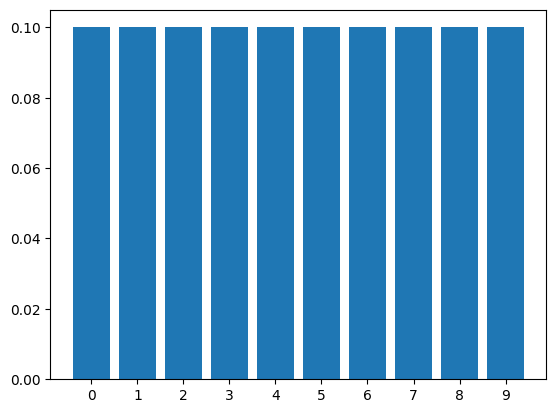

In [ ]:
#giving output



names = [0,1,2,3,4,5,6,7,8,9]
values = LC_Layer[len(LC_Layer)-1]
print(LC_Layer[len(LC_Layer)-1])
plt.bar(names, values, tick_label=names)
plt.show()



In [ ]:
#gives the output prediction in form of a number
def output(list):
  return(list[len(list)-1].index(max(list[len(list)-1])))

In [ ]:
print(output(LC_Layer))

9


In [ ]:
y_true = np.array([[0, 1, 0], [0, 0, 1]])
y_pred = np.array([[0.05, 0.95, 0], [0.1, 0.8, 0.1]])
# Using 'auto'/'sum_over_batch_size' reduction type.
cce = tf.keras.losses.CategoricalCrossentropy()
cce(y_true, y_pred).numpy()


1.176939193690798